<a href="https://colab.research.google.com/github/m-bashari-m/sample-DNN-projects/blob/main/2.2_FMNIST_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [13]:
n_classes = np.max(train_labels) + 1
n_classes

10

In [14]:
def plot_image(images, n_row, n_col):
  index = 1
  plt.figure(figsize=(10, 5))
  for _ in range(n_row):
    for _ in range(n_col):
      plt.subplot(n_row, n_col, index)
      plt.imshow(images[index-1], cmap='binary')
      plt.axis('off')
      index += 1

  plt.show()

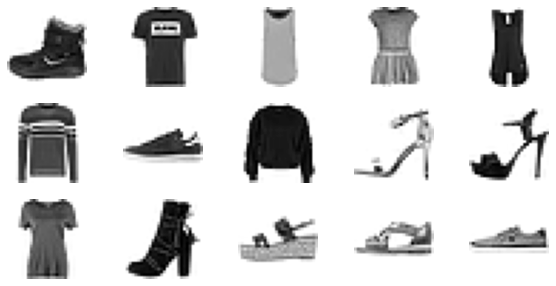

In [15]:
n_row = 3
n_col = 5
plot_image(train_images[:n_row * n_col], n_row, n_col)

In [16]:
train_images = train_images.astype(np.float32) / 255
test_images = test_images.astype(np.float32) / 255

train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [17]:
def make_model():
    model = Sequential()
    model.add(Conv2D(32 ,(3,3) ,activation = 'relu'  ,input_shape = (28,28,1)))
    model.add(MaxPooling2D(2))
    model.add(Conv2D(64 ,(3,3) ,activation = 'relu' ))
    model.add(MaxPooling2D(2))
    model.add(Conv2D(128 ,(3,3) ,activation = 'relu' ))
    model.add(MaxPooling2D(2))
    model.add(Flatten())
    model.add(Dense(100 ,activation = 'relu'))
    model.add(Dropout(.5))
    model.add(Dense(100 ,activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes ,activation ='softmax'))

    return model


In [18]:
model = make_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 128)       

In [19]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=50,
    decay_rate=.99)

optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [20]:
history = model.fit(train_images ,train_labels ,
                    batch_size = 32 ,
                    epochs = 20 ,
                    validation_split = 0.2)

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.8260 - accuracy: 0.6991 - val_loss: 0.4952 - val_accuracy: 0.8158
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5279 - accuracy: 0.8137 - val_loss: 0.4101 - val_accuracy: 0.8476
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4471 - accuracy: 0.8446 - val_loss: 0.3817 - val_accuracy: 0.8565
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4001 - accuracy: 0.8622 - val_loss: 0.3521 - val_accuracy: 0.8723
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3675 - accuracy: 0.8720 - val_loss: 0.3423 - val_accuracy: 0.8733
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3498 - accuracy: 0.8803 - val_loss: 0.3250 - val_accuracy: 0.8806
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3321 - accuracy: 0.8851 - val_loss: 0.3260 - val_accuracy:

In [21]:
import pandas as pd
def plot_history(history):
  pd.DataFrame(history.history).plot()

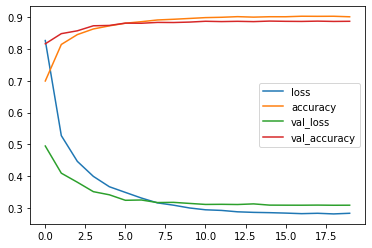

In [23]:
plot_history(history)

In [24]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3263 - accuracy: 0.8852


[0.326316773891449, 0.885200023651123]